# Pandas

The `numpy` module is excellent for numerical computations, but to handle missing data or arrays with mixed types takes more work. The `pandas` module is currently the most widely used tool for data manipulation, providing high-performance, easy-to-use data structures and advanced data analysis tools.

In particular `pandas` features:

* A fast and efficient "DataFrame" object for data manipulation with integrated indexing;
* Tools for reading and writing data between in-memory data structures and different formats (CSV, Excel, SQL, HDF5);
* Intelligent data alignment and integrated handling of missing data;
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;
* Aggregating or transforming data with a powerful "group-by" engine; 
* High performance merging and joining of data sets;
* Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;
* Time series-functionalities;
* Highly optimized for performance, with critical code paths written in Cython or C.


In [1]:
import pandas as pd
import numpy as np

## Series

Series are completely equivalent to 1D array but with axis labels and the possibility to store heterogeneous elements. Of paramount importance are the time-series, used to define time evolutions of a phenomenon. 


In [2]:
from string import ascii_lowercase as letters

# Creating a series, accessing indexes, values and values by their index 
xs = pd.Series(np.arange(10)*0.5, index=tuple(letters[:10]))
print (xs,'\n')
print (xs.index,'\n')
# Values of the Series are actually a numpy array
print (xs.values, type(xs.values),'\n')
print (xs['f'], xs.f, xs.h, '\n')
print (xs[['d', 'f', 'h']], '\n')

a    0.0
b    0.5
c    1.0
d    1.5
e    2.0
f    2.5
g    3.0
h    3.5
i    4.0
j    4.5
dtype: float64 

Index(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], dtype='object') 

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5] <class 'numpy.ndarray'> 

2.5 2.5 3.5 

d    1.5
f    2.5
h    3.5
dtype: float64 



In [3]:
# Extracting elements and operations: same as numpy array
print (xs[:3],'\n')
print (xs[7:], '\n')
print (xs[::3], '\n')
print (xs[xs>3], '\n')
print (np.exp(xs), '\n')
print (np.mean(xs), np.std(xs), '\n')

a    0.0
b    0.5
c    1.0
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a    0.0
d    1.5
g    3.0
j    4.5
dtype: float64 

h    3.5
i    4.0
j    4.5
dtype: float64 

a     1.000000
b     1.648721
c     2.718282
d     4.481689
e     7.389056
f    12.182494
g    20.085537
h    33.115452
i    54.598150
j    90.017131
dtype: float64 

2.25 1.4361406616345072 



In [4]:
# Series can be created from python dictionary too.
# Not that the elements can be whatever!
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
pd.Series(d)



b         1
a       cat
c    [2, 3]
dtype: object

A key difference between Series and ndarray is that operations between Series automatically align the data based on label. Thus, you can write computations without giving consideration to whether the Series involved have the same labels.

In [5]:
s = pd.Series(np.random.randn(5), index=tuple(letters[:5]))
s[1:] + s[:-1]

a         NaN
b    1.680051
c    1.604733
d    0.404347
e         NaN
dtype: float64

### Time series

Time series are very often used to profile the behaviour of a quantity as a function of time. Pandas as a special index for that, `DatetimeIndex`, that can be created e.g. with the function `pd.data_range()`

In [6]:
# to define a date, the datetime module is very useful
import datetime as dt
date = dt.date.today()
date = dt.datetime(2018,11,19,14,45,10,15)
print (date)

# otherwise, several notations are interpreted too
date = 'Nov 19 2018'
date = '19/11/2018 14:45:00'
print (date)

days = pd.date_range(date, periods=7, freq='D')
print (days)

seconds = pd.date_range(date, periods=3600, freq='s')
print (seconds)


2018-11-19 14:45:10.000015
19/11/2018 14:45:00
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-20 14:45:00',
               '2018-11-21 14:45:00', '2018-11-22 14:45:00',
               '2018-11-23 14:45:00', '2018-11-24 14:45:00',
               '2018-11-25 14:45:00'],
              dtype='datetime64[ns]', freq='D')
DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 14:45:01',
               '2018-11-19 14:45:02', '2018-11-19 14:45:03',
               '2018-11-19 14:45:04', '2018-11-19 14:45:05',
               '2018-11-19 14:45:06', '2018-11-19 14:45:07',
               '2018-11-19 14:45:08', '2018-11-19 14:45:09',
               ...
               '2018-11-19 15:44:50', '2018-11-19 15:44:51',
               '2018-11-19 15:44:52', '2018-11-19 15:44:53',
               '2018-11-19 15:44:54', '2018-11-19 15:44:55',
               '2018-11-19 15:44:56', '2018-11-19 15:44:57',
               '2018-11-19 15:44:58', '2018-11-19 15:44:59'],
              dtype='datetime64[ns]', length=3600, fr

To learn more about the frequency strings, please see this [link](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)


Timestamped data is the most basic type of time series data that associates values with points in time. For pandas objects it means using the points in time.

functions like `pd.to_datetime` can be used, for instance, when reading information as string from a dataset

In [7]:
tstamp = pd.Timestamp(dt.datetime(2018, 11, 19))

# internally it counts the nanoseconds from January 1st 1970
#tstamp = pd.Timestamp(dt.datetime(1970, 1, 1, 0, 0, 0, 1))
print(tstamp.value)

# when creating a timestamp the format can be explicitly passed
print (pd.to_datetime('2010/11/12', format='%Y/%m/%d'))
print (pd.to_datetime('12-11-2010 00:00', format='%d-%m-%Y %H:%M'))


1542585600000000000
2010-11-12 00:00:00
2010-11-12 00:00:00


A standard series can be created and (range of) elements can be used as indexes

In [8]:
tseries = pd.Series(np.random.normal(10, 1, len(days)), index=days)
# Extracting elements
print (tseries[0:4], '\n')
print (tseries['2018-11-19':'2018-11-21'], '\n') # Note - includes end time


2018-11-19 14:45:00    11.505916
2018-11-20 14:45:00    10.477975
2018-11-21 14:45:00    11.799194
2018-11-22 14:45:00     9.426130
Freq: D, dtype: float64 

2018-11-19 14:45:00    11.505916
2018-11-20 14:45:00    10.477975
2018-11-21 14:45:00    11.799194
Freq: D, dtype: float64 



`pd.to_datetime` can also be used to create a `DatetimeIndex`:

In [9]:
pd.to_datetime([1, 2, 3], unit='D', origin=pd.Timestamp('1980-02-03'))

DatetimeIndex(['1980-02-04', '1980-02-05', '1980-02-06'], dtype='datetime64[ns]', freq=None)

## DataFrame

A pandas DataFrame is like a simple tabular spreadsheet. For future reference (or for people already familiar with R), a pandas DataFrame is very similar to the R DataFrame.

Each column in a DataFrame is a Series object.

The element can be whatever, missing data are dealt with too (as NaN)

### DataFrame creation

A DataFrame can be created implicitly, with, e.g., a DatatimeIndex object as index:

In [10]:
entries=10
dates=pd.date_range('19/11/2018 14:45:00',freq='h', periods=entries)
df = pd.DataFrame(np.random.randn(entries,4), index=dates, columns=['A','B','C','D'])
df


,A,B,C,D
2018-11-19 14:45:00,0.526191,-1.147510,-0.135475,-0.136086
2018-11-19 15:45:00,0.523078,1.771418,-0.372923,1.311788
2018-11-19 16:45:00,1.572630,-0.165236,-1.994591,-0.724262
2018-11-19 17:45:00,1.441034,-0.969666,0.941981,1.046488
2018-11-19 18:45:00,0.822525,-0.981071,0.002690,-0.362517
2018-11-19 19:45:00,0.726352,-0.175514,-0.823754,0.373560
2018-11-19 20:45:00,0.319490,0.973429,-0.793305,0.114880
2018-11-19 21:45:00,0.380210,-2.003767,0.898132,-0.084092
2018-11-19 22:45:00,0.379967,1.212481,1.424788,0.249899
2018-11-19 23:45:00,-0.271565,0.637111,0.676318,-0.580961


or by means of a dictionary:


In [11]:
df2 = pd.DataFrame(
    { 'A' : 1.,
      'B' : pd.Timestamp('20130102'),
      'C' : pd.Series(1,index=range(4),dtype='float32'),
      'D' : np.arange(7,11),
      'E' : pd.Categorical(["test","train","test","train"]),
    }
    )
   

In [12]:
df2

,A,B,C,D,E
0,1.0,2013-01-02,1.0,7,test
1,1.0,2013-01-02,1.0,8,train
2,1.0,2013-01-02,1.0,9,test
3,1.0,2013-01-02,1.0,10,train


### Viewing Data

In [13]:
df.head()

,A,B,C,D
2018-11-19 14:45:00,0.526191,-1.147510,-0.135475,-0.136086
2018-11-19 15:45:00,0.523078,1.771418,-0.372923,1.311788
2018-11-19 16:45:00,1.572630,-0.165236,-1.994591,-0.724262
2018-11-19 17:45:00,1.441034,-0.969666,0.941981,1.046488
2018-11-19 18:45:00,0.822525,-0.981071,0.002690,-0.362517


In [14]:
df.tail(4)

,A,B,C,D
2018-11-19 20:45:00,0.319490,0.973429,-0.793305,0.114880
2018-11-19 21:45:00,0.380210,-2.003767,0.898132,-0.084092
2018-11-19 22:45:00,0.379967,1.212481,1.424788,0.249899
2018-11-19 23:45:00,-0.271565,0.637111,0.676318,-0.580961


In [15]:
df.index

DatetimeIndex(['2018-11-19 14:45:00', '2018-11-19 15:45:00',
               '2018-11-19 16:45:00', '2018-11-19 17:45:00',
               '2018-11-19 18:45:00', '2018-11-19 19:45:00',
               '2018-11-19 20:45:00', '2018-11-19 21:45:00',
               '2018-11-19 22:45:00', '2018-11-19 23:45:00'],
              dtype='datetime64[ns]', freq='H')

In [16]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [17]:
df.values

array([[ 0.52619096, -1.14750971, -0.13547542, -0.13608647],
       [ 0.52307798,  1.77141782, -0.37292286,  1.3117882 ],
       [ 1.57263031, -0.16523645, -1.99459099, -0.72426249],
       [ 1.44103392, -0.96966564,  0.94198098,  1.04648783],
       [ 0.82252549, -0.98107106,  0.00268976, -0.36251749],
       [ 0.72635218, -0.17551433, -0.82375443,  0.37356036],
       [ 0.3194902 ,  0.97342938, -0.79330511,  0.11487973],
       [ 0.38021026, -2.00376723,  0.89813197, -0.08409158],
       [ 0.37996706,  1.21248118,  1.42478766,  0.24989872],
       [-0.27156538,  0.63711084,  0.67631825, -0.58096111]])

In [18]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.641991,-0.084833,-0.017614,0.120870
std,0.542381,1.210246,1.033980,0.658627
min,-0.271565,-2.003767,-1.994591,-0.724262
25%,0.380028,-0.978220,-0.688210,-0.305910
50%,0.524634,-0.170375,-0.066393,0.015394
75%,0.798482,0.889350,0.842679,0.342645
max,1.572630,1.771418,1.424788,1.311788


In [19]:
df.T

,2018-11-19 14:45:00,2018-11-19 15:45:00,2018-11-19 16:45:00,2018-11-19 17:45:00,2018-11-19 18:45:00,2018-11-19 19:45:00,2018-11-19 20:45:00,2018-11-19 21:45:00,2018-11-19 22:45:00,2018-11-19 23:45:00
A,0.526191,0.523078,1.572630,1.441034,0.822525,0.726352,0.319490,0.380210,0.379967,-0.271565
B,-1.147510,1.771418,-0.165236,-0.969666,-0.981071,-0.175514,0.973429,-2.003767,1.212481,0.637111
C,-0.135475,-0.372923,-1.994591,0.941981,0.002690,-0.823754,-0.793305,0.898132,1.424788,0.676318
D,-0.136086,1.311788,-0.724262,1.046488,-0.362517,0.373560,0.114880,-0.084092,0.249899,-0.580961


In [20]:
df.sort_index(axis=0,ascending=False)

,A,B,C,D
2018-11-19 23:45:00,-0.271565,0.637111,0.676318,-0.580961
2018-11-19 22:45:00,0.379967,1.212481,1.424788,0.249899
2018-11-19 21:45:00,0.380210,-2.003767,0.898132,-0.084092
2018-11-19 20:45:00,0.319490,0.973429,-0.793305,0.114880
2018-11-19 19:45:00,0.726352,-0.175514,-0.823754,0.373560
2018-11-19 18:45:00,0.822525,-0.981071,0.002690,-0.362517
2018-11-19 17:45:00,1.441034,-0.969666,0.941981,1.046488
2018-11-19 16:45:00,1.572630,-0.165236,-1.994591,-0.724262
2018-11-19 15:45:00,0.523078,1.771418,-0.372923,1.311788
2018-11-19 14:45:00,0.526191,-1.147510,-0.135475,-0.136086


In [21]:
df.sort_values(by="C")

,A,B,C,D
2018-11-19 16:45:00,1.572630,-0.165236,-1.994591,-0.724262
2018-11-19 19:45:00,0.726352,-0.175514,-0.823754,0.373560
2018-11-19 20:45:00,0.319490,0.973429,-0.793305,0.114880
2018-11-19 15:45:00,0.523078,1.771418,-0.372923,1.311788
2018-11-19 14:45:00,0.526191,-1.147510,-0.135475,-0.136086
2018-11-19 18:45:00,0.822525,-0.981071,0.002690,-0.362517
2018-11-19 23:45:00,-0.271565,0.637111,0.676318,-0.580961
2018-11-19 21:45:00,0.380210,-2.003767,0.898132,-0.084092
2018-11-19 17:45:00,1.441034,-0.969666,0.941981,1.046488
2018-11-19 22:45:00,0.379967,1.212481,1.424788,0.249899


## Selection

### Getting slices

The following show how to get part of the DataFrame (i.e. not just the elements)

In [22]:
## standard and safe
print (df['A'],'\n')

## equivalent but dangerous (imagine blank spaces in the name of the column..)
print (df.A)

2018-11-19 14:45:00    0.526191
2018-11-19 15:45:00    0.523078
2018-11-19 16:45:00    1.572630
2018-11-19 17:45:00    1.441034
2018-11-19 18:45:00    0.822525
2018-11-19 19:45:00    0.726352
2018-11-19 20:45:00    0.319490
2018-11-19 21:45:00    0.380210
2018-11-19 22:45:00    0.379967
2018-11-19 23:45:00   -0.271565
Freq: H, Name: A, dtype: float64 

2018-11-19 14:45:00    0.526191
2018-11-19 15:45:00    0.523078
2018-11-19 16:45:00    1.572630
2018-11-19 17:45:00    1.441034
2018-11-19 18:45:00    0.822525
2018-11-19 19:45:00    0.726352
2018-11-19 20:45:00    0.319490
2018-11-19 21:45:00    0.380210
2018-11-19 22:45:00    0.379967
2018-11-19 23:45:00   -0.271565
Freq: H, Name: A, dtype: float64


In [23]:
# selecting rows by counting
print (df[0:3])

# or by index
print (df["2018-11-19 14:45:00":"2018-11-19 16:45:00"])

                            A         B         C         D
2018-11-19 14:45:00  0.526191 -1.147510 -0.135475 -0.136086
2018-11-19 15:45:00  0.523078  1.771418 -0.372923  1.311788
2018-11-19 16:45:00  1.572630 -0.165236 -1.994591 -0.724262
                            A         B         C         D
2018-11-19 14:45:00  0.526191 -1.147510 -0.135475 -0.136086
2018-11-19 15:45:00  0.523078  1.771418 -0.372923  1.311788
2018-11-19 16:45:00  1.572630 -0.165236 -1.994591 -0.724262


### Selection by label

In [24]:
# getting a cross section (part of the DataFrame) using a label
df.loc[dates[0]]

A    0.526191
B   -1.147510
C   -0.135475
D   -0.136086
Name: 2018-11-19 14:45:00, dtype: float64

In [25]:
# selecting on a multi-axis by label:
df.loc[:,['A','B']]

,A,B
2018-11-19 14:45:00,0.526191,-1.147510
2018-11-19 15:45:00,0.523078,1.771418
2018-11-19 16:45:00,1.572630,-0.165236
2018-11-19 17:45:00,1.441034,-0.969666
2018-11-19 18:45:00,0.822525,-0.981071
2018-11-19 19:45:00,0.726352,-0.175514
2018-11-19 20:45:00,0.319490,0.973429
2018-11-19 21:45:00,0.380210,-2.003767
2018-11-19 22:45:00,0.379967,1.212481
2018-11-19 23:45:00,-0.271565,0.637111


In [26]:
# showing label slicing, both endpoints are included:
df.loc['2018-11-19 18:45:00':'2018-11-19 20:45:00',['A','B']]

,A,B
2018-11-19 18:45:00,0.822525,-0.981071
2018-11-19 19:45:00,0.726352,-0.175514
2018-11-19 20:45:00,0.319490,0.973429


In [27]:
# getting an individual element
print (df.loc[dates[1],'A'])

# equivalently
print (df.at[dates[1],'A'])

0.5230779794943938
0.5230779794943938


### Selecting by position

In [28]:
# select via the position of the passed integers:
print (df.iloc[3],'\n')

# notation similar to numpy/python
print (df.iloc[3:5,0:2])

A    1.441034
B   -0.969666
C    0.941981
D    1.046488
Name: 2018-11-19 17:45:00, dtype: float64 

                            A         B
2018-11-19 17:45:00  1.441034 -0.969666
2018-11-19 18:45:00  0.822525 -0.981071


In [29]:
# selecting raws 1,2 and 4 for columns 0 and 2
df.iloc[[1,2,4],[0,2]]

,A,C
2018-11-19 15:45:00,0.523078,-0.372923
2018-11-19 16:45:00,1.572630,-1.994591
2018-11-19 18:45:00,0.822525,0.002690


In [30]:
# slicing rows explicitly
print (df.iloc[1:3,:],'\n')

# slicing columns explicitly
print (df.iloc[:,1:3])


                            A         B         C         D
2018-11-19 15:45:00  0.523078  1.771418 -0.372923  1.311788
2018-11-19 16:45:00  1.572630 -0.165236 -1.994591 -0.724262 

                            B         C
2018-11-19 14:45:00 -1.147510 -0.135475
2018-11-19 15:45:00  1.771418 -0.372923
2018-11-19 16:45:00 -0.165236 -1.994591
2018-11-19 17:45:00 -0.969666  0.941981
2018-11-19 18:45:00 -0.981071  0.002690
2018-11-19 19:45:00 -0.175514 -0.823754
2018-11-19 20:45:00  0.973429 -0.793305
2018-11-19 21:45:00 -2.003767  0.898132
2018-11-19 22:45:00  1.212481  1.424788
2018-11-19 23:45:00  0.637111  0.676318


In [31]:
# selecting an individual element by position
df.iloc[1,1]
#df.iat[1,1]


1.7714178184420177

### Boolean index

Very powerful way of filtering out data with certain features. Notation is very similar to numpy arrays.

In [32]:
# Filter by a boolean condition on the values of a single column
df[df['B'] > 0]

,A,B,C,D
2018-11-19 15:45:00,0.523078,1.771418,-0.372923,1.311788
2018-11-19 20:45:00,0.319490,0.973429,-0.793305,0.114880
2018-11-19 22:45:00,0.379967,1.212481,1.424788,0.249899
2018-11-19 23:45:00,-0.271565,0.637111,0.676318,-0.580961


In [33]:
# Selecting on the basis of boolean conditions applied to the whole DataFrame
df[df>0]

# a DataFrame with the same shape is returned, with NaN's where condition is not met

,A,B,C,D
2018-11-19 14:45:00,0.526191,NaN,NaN,NaN
2018-11-19 15:45:00,0.523078,1.771418,NaN,1.311788
2018-11-19 16:45:00,1.572630,NaN,NaN,NaN
2018-11-19 17:45:00,1.441034,NaN,0.941981,1.046488
2018-11-19 18:45:00,0.822525,NaN,0.002690,NaN
2018-11-19 19:45:00,0.726352,NaN,NaN,0.373560
2018-11-19 20:45:00,0.319490,0.973429,NaN,0.114880
2018-11-19 21:45:00,0.380210,NaN,0.898132,NaN
2018-11-19 22:45:00,0.379967,1.212481,1.424788,0.249899
2018-11-19 23:45:00,NaN,0.637111,0.676318,NaN


### Setting

Combination of selection and setting of values

In [34]:
# setting values by label (same as by position)
df.at[dates[0],'A'] = 0

# setting and assigning a numpy array
df.loc[:,'D'] = np.array([5] * len(df))

# defining a brend new column
df['E'] = np.arange(len(df))*0.5

# defining a brend new column by means of a pd.Series: indexes must be the same!
df['E prime'] = pd.Series(np.arange(len(df))*2, index=df.index)


In [35]:
def dcos(theta):
    theta = theta*(np.pi/180)
    return np.cos(theta)
 
df['cosine'] = pd.Series(df["E"].apply(dcos), index=df.index)
df


,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.147510,-0.135475,5,0.0,0,1.000000
2018-11-19 15:45:00,0.523078,1.771418,-0.372923,5,0.5,2,0.999962
2018-11-19 16:45:00,1.572630,-0.165236,-1.994591,5,1.0,4,0.999848
2018-11-19 17:45:00,1.441034,-0.969666,0.941981,5,1.5,6,0.999657
2018-11-19 18:45:00,0.822525,-0.981071,0.002690,5,2.0,8,0.999391
2018-11-19 19:45:00,0.726352,-0.175514,-0.823754,5,2.5,10,0.999048
2018-11-19 20:45:00,0.319490,0.973429,-0.793305,5,3.0,12,0.998630
2018-11-19 21:45:00,0.380210,-2.003767,0.898132,5,3.5,14,0.998135
2018-11-19 22:45:00,0.379967,1.212481,1.424788,5,4.0,16,0.997564
2018-11-19 23:45:00,-0.271565,0.637111,0.676318,5,4.5,18,0.996917


In [36]:
# another example of global setting
df2=df.copy()
df2[df2>0] = -df2
df2

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.147510,-0.135475,-5,0.0,0,-1.000000
2018-11-19 15:45:00,-0.523078,-1.771418,-0.372923,-5,-0.5,-2,-0.999962
2018-11-19 16:45:00,-1.572630,-0.165236,-1.994591,-5,-1.0,-4,-0.999848
2018-11-19 17:45:00,-1.441034,-0.969666,-0.941981,-5,-1.5,-6,-0.999657
2018-11-19 18:45:00,-0.822525,-0.981071,-0.002690,-5,-2.0,-8,-0.999391
2018-11-19 19:45:00,-0.726352,-0.175514,-0.823754,-5,-2.5,-10,-0.999048
2018-11-19 20:45:00,-0.319490,-0.973429,-0.793305,-5,-3.0,-12,-0.998630
2018-11-19 21:45:00,-0.380210,-2.003767,-0.898132,-5,-3.5,-14,-0.998135
2018-11-19 22:45:00,-0.379967,-1.212481,-1.424788,-5,-4.0,-16,-0.997564
2018-11-19 23:45:00,-0.271565,-0.637111,-0.676318,-5,-4.5,-18,-0.996917


### Dropping

N.B.: dropping doesn't act permanently on the DataFrame, i.e. to get that do :
```python
df = df.drop(....)
```

In [37]:
# Dropping by column
#df.drop(['E prime'], axis=1)

#which is equivalent to
df.drop(labels = ['E prime','cosine'], axis = 1)

,A,B,C,D,E
2018-11-19 14:45:00,0.000000,-1.147510,-0.135475,5,0.0
2018-11-19 15:45:00,0.523078,1.771418,-0.372923,5,0.5
2018-11-19 16:45:00,1.572630,-0.165236,-1.994591,5,1.0
2018-11-19 17:45:00,1.441034,-0.969666,0.941981,5,1.5
2018-11-19 18:45:00,0.822525,-0.981071,0.002690,5,2.0
2018-11-19 19:45:00,0.726352,-0.175514,-0.823754,5,2.5
2018-11-19 20:45:00,0.319490,0.973429,-0.793305,5,3.0
2018-11-19 21:45:00,0.380210,-2.003767,0.898132,5,3.5
2018-11-19 22:45:00,0.379967,1.212481,1.424788,5,4.0
2018-11-19 23:45:00,-0.271565,0.637111,0.676318,5,4.5


In [38]:
help(pd.DataFrame.drop)

Help on function drop in module pandas.core.frame:

drop(self, labels=None, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')
    Drop specified labels from rows or columns.
    
    Remove rows or columns by specifying label names and corresponding
    axis, or by specifying directly index or column names. When using a
    multi-index, labels on different levels can be removed by specifying
    the level.
    
    Parameters
    ----------
    labels : single label or list-like
        Index or column labels to drop.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Whether to drop labels from the index (0 or 'index') or
        columns (1 or 'columns').
    index, columns : single label or list-like
        Alternative to specifying axis (``labels, axis=1``
        is equivalent to ``columns=labels``).
    
        .. versionadded:: 0.21.0
    level : int or level name, optional
        For MultiIndex, level from which the labels will be removed.

In [39]:
# Dropping by raws
# save and always working
df.drop(df.index[[1,2,3,4]])

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.147510,-0.135475,5,0.0,0,1.000000
2018-11-19 19:45:00,0.726352,-0.175514,-0.823754,5,2.5,10,0.999048
2018-11-19 20:45:00,0.319490,0.973429,-0.793305,5,3.0,12,0.998630
2018-11-19 21:45:00,0.380210,-2.003767,0.898132,5,3.5,14,0.998135
2018-11-19 22:45:00,0.379967,1.212481,1.424788,5,4.0,16,0.997564
2018-11-19 23:45:00,-0.271565,0.637111,0.676318,5,4.5,18,0.996917


In [40]:
# something like df.drop('index_name') 
# would work but the type of index must be specificed, 
# in particular with DatetimeIndex
df.drop(pd.to_datetime("2018-11-19 22:45:00"))

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.147510,-0.135475,5,0.0,0,1.000000
2018-11-19 15:45:00,0.523078,1.771418,-0.372923,5,0.5,2,0.999962
2018-11-19 16:45:00,1.572630,-0.165236,-1.994591,5,1.0,4,0.999848
2018-11-19 17:45:00,1.441034,-0.969666,0.941981,5,1.5,6,0.999657
2018-11-19 18:45:00,0.822525,-0.981071,0.002690,5,2.0,8,0.999391
2018-11-19 19:45:00,0.726352,-0.175514,-0.823754,5,2.5,10,0.999048
2018-11-19 20:45:00,0.319490,0.973429,-0.793305,5,3.0,12,0.998630
2018-11-19 21:45:00,0.380210,-2.003767,0.898132,5,3.5,14,0.998135
2018-11-19 23:45:00,-0.271565,0.637111,0.676318,5,4.5,18,0.996917


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations.

In [41]:
df_wNan = df[df>0].drop(['A', 'B', 'C'], axis = 1)
df_wNan

,D,E,E prime,cosine
2018-11-19 14:45:00,5,NaN,NaN,1.000000
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


In [42]:
# dropping raws with at least a Nan
df_wNan.dropna(how='any')

,D,E,E prime,cosine
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


In [43]:
# getting a mask
#df_wNan.isna()
df_wNan.notna()

,D,E,E prime,cosine
2018-11-19 14:45:00,True,False,False,True
2018-11-19 15:45:00,True,True,True,True
2018-11-19 16:45:00,True,True,True,True
2018-11-19 17:45:00,True,True,True,True
2018-11-19 18:45:00,True,True,True,True
2018-11-19 19:45:00,True,True,True,True
2018-11-19 20:45:00,True,True,True,True
2018-11-19 21:45:00,True,True,True,True
2018-11-19 22:45:00,True,True,True,True
2018-11-19 23:45:00,True,True,True,True


In [44]:
#help(pd.DataFrame)

In [45]:
# filling missing data
df_wNan.fillna(value=0)

,D,E,E prime,cosine
2018-11-19 14:45:00,5,0.0,0.0,1.000000
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


Fill gaps forward or backward by propagating non-NA values forward or backward:

In [46]:
df_wNan.fillna(method='pad')

,D,E,E prime,cosine
2018-11-19 14:45:00,5,NaN,NaN,1.000000
2018-11-19 15:45:00,5,0.5,2.0,0.999962
2018-11-19 16:45:00,5,1.0,4.0,0.999848
2018-11-19 17:45:00,5,1.5,6.0,0.999657
2018-11-19 18:45:00,5,2.0,8.0,0.999391
2018-11-19 19:45:00,5,2.5,10.0,0.999048
2018-11-19 20:45:00,5,3.0,12.0,0.998630
2018-11-19 21:45:00,5,3.5,14.0,0.998135
2018-11-19 22:45:00,5,4.0,16.0,0.997564
2018-11-19 23:45:00,5,4.5,18.0,0.996917


## Operations

Here comes the most relevant advantage of DataFrame. Operations on columns are extremly fast, almost as fast as the actual operation between elements in a raw

In [47]:
# Some statistics (mean() just as an example)
# raws
print (df.mean(axis=0),'\n')
# columns
print (df.mean(axis=1),'\n')

A          0.589372
B         -0.084833
C         -0.017614
D          5.000000
E          2.250000
E prime    9.000000
cosine     0.998915
dtype: float64 

2018-11-19 14:45:00    0.673859
2018-11-19 15:45:00    1.488791
2018-11-19 16:45:00    1.487522
2018-11-19 17:45:00    2.130430
2018-11-19 18:45:00    2.263362
2018-11-19 19:45:00    2.603733
2018-11-19 20:45:00    3.071178
2018-11-19 21:45:00    3.253244
2018-11-19 22:45:00    4.144971
2018-11-19 23:45:00    4.219826
Freq: H, dtype: float64 



In [48]:
# global operations on columns
df.apply(np.cumsum)

,A,B,C,D,E,E prime,cosine
2018-11-19 14:45:00,0.000000,-1.147510,-0.135475,5,0.0,0,1.000000
2018-11-19 15:45:00,0.523078,0.623908,-0.508398,10,0.5,2,1.999962
2018-11-19 16:45:00,2.095708,0.458672,-2.502989,15,1.5,6,2.999810
2018-11-19 17:45:00,3.536742,-0.510994,-1.561008,20,3.0,12,3.999467
2018-11-19 18:45:00,4.359268,-1.492065,-1.558319,25,5.0,20,4.998858
2018-11-19 19:45:00,5.085620,-1.667579,-2.382073,30,7.5,30,5.997906
2018-11-19 20:45:00,5.405110,-0.694150,-3.175378,35,10.5,42,6.996536
2018-11-19 21:45:00,5.785320,-2.697917,-2.277246,40,14.0,56,7.994670
2018-11-19 22:45:00,6.165287,-1.485436,-0.852458,45,18.0,72,8.992234
2018-11-19 23:45:00,5.893722,-0.848325,-0.176140,50,22.5,90,9.989152


In [49]:
df.apply(lambda x: x.max() - x.min())

A           1.844196
B           3.775185
C           3.419379
D           0.000000
E           4.500000
E prime    18.000000
cosine      0.003083
dtype: float64

In [50]:
# syntax is as usual similar to that of numpy arrays
df['A']+df['B']

2018-11-19 14:45:00   -1.147510
2018-11-19 15:45:00    2.294496
2018-11-19 16:45:00    1.407394
2018-11-19 17:45:00    0.471368
2018-11-19 18:45:00   -0.158546
2018-11-19 19:45:00    0.550838
2018-11-19 20:45:00    1.292920
2018-11-19 21:45:00   -1.623557
2018-11-19 22:45:00    1.592448
2018-11-19 23:45:00    0.365545
Freq: H, dtype: float64

Let's play it hard and load (in memory) a (relatively) large dataset

In [53]:
file_name="data_000637.txt"
data=pd.read_csv(file_name)
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
6,1,0,61,3869200167,2772,14
7,1,0,139,3869200167,2776,0
8,1,0,62,3869200167,2774,21
9,1,0,60,3869200167,2788,7


Let's know do some operations among (elements of) columns

In [54]:
# the one-liner killing it all
data['timens']=data['TDC_MEAS']*25/30+data['BX_COUNTER']*25

In [55]:
# the old slooow way
def conversion(data):
    result=[]
    
    for i in range(len(data)): 
        result.append(data.loc[data.index[i],'TDC_MEAS']*25/30.+data.loc[data.index[i],'BX_COUNTER']*25)
    return result

data['timens']=conversion(data)

In [56]:
data

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,timens
0,1,0,123,3869200167,2374,26,59371.666667
1,1,0,124,3869200167,2374,27,59372.500000
2,1,0,63,3869200167,2553,28,63848.333333
3,1,0,64,3869200167,2558,19,63965.833333
4,1,0,64,3869200167,2760,25,69020.833333
5,1,0,63,3869200167,2762,4,69053.333333
6,1,0,61,3869200167,2772,14,69311.666667
7,1,0,139,3869200167,2776,0,69400.000000
8,1,0,62,3869200167,2774,21,69367.500000
9,1,0,60,3869200167,2788,7,69705.833333


## Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

### Concat

concatenation (adding raws) is straightforward


In [57]:
rdf = pd.DataFrame(np.random.randn(10, 4))
rdf

,0,1,2,3
0,0.236609,-0.516422,-0.693391,-1.721301
1,-1.448963,1.456527,0.367834,-0.333706
2,1.384522,0.839197,-2.371963,0.624047
3,-1.219016,-0.356445,-0.044908,1.276536
4,1.122887,-0.629854,1.055124,1.087599
5,0.131796,-1.390813,2.093751,0.166693
6,0.994578,-0.230230,1.242311,-0.173510
7,0.189475,0.722348,-0.974585,0.703551
8,-0.847177,0.409645,0.522659,0.903150
9,-0.062172,0.214272,0.288979,-0.660919


In [58]:
# divide it into pieaces raw-wise
pieces = [rdf[:3], rdf[3:7], rdf[7:]]
pieces

[          0         1         2         3
 0  0.236609 -0.516422 -0.693391 -1.721301
 1 -1.448963  1.456527  0.367834 -0.333706
 2  1.384522  0.839197 -2.371963  0.624047,
           0         1         2         3
 3 -1.219016 -0.356445 -0.044908  1.276536
 4  1.122887 -0.629854  1.055124  1.087599
 5  0.131796 -1.390813  2.093751  0.166693
 6  0.994578 -0.230230  1.242311 -0.173510,
           0         1         2         3
 7  0.189475  0.722348 -0.974585  0.703551
 8 -0.847177  0.409645  0.522659  0.903150
 9 -0.062172  0.214272  0.288979 -0.660919]

In [59]:
# put it back together
pd.concat(pieces)

# indexes can be ignored
#pd.concat(pieces, ignore_index=True)

# in case of dimension mismatch, Nan are added where needed

,0,1,2,3
0,0.236609,-0.516422,-0.693391,-1.721301
1,-1.448963,1.456527,0.367834,-0.333706
2,1.384522,0.839197,-2.371963,0.624047
3,-1.219016,-0.356445,-0.044908,1.276536
4,1.122887,-0.629854,1.055124,1.087599
5,0.131796,-1.390813,2.093751,0.166693
6,0.994578,-0.230230,1.242311,-0.173510
7,0.189475,0.722348,-0.974585,0.703551
8,-0.847177,0.409645,0.522659,0.903150
9,-0.062172,0.214272,0.288979,-0.660919


In [60]:
# appending a single raw (as a Series)
s = rdf.iloc[3]
rdf.append(s, ignore_index=True)


,0,1,2,3
0,0.236609,-0.516422,-0.693391,-1.721301
1,-1.448963,1.456527,0.367834,-0.333706
2,1.384522,0.839197,-2.371963,0.624047
3,-1.219016,-0.356445,-0.044908,1.276536
4,1.122887,-0.629854,1.055124,1.087599
5,0.131796,-1.390813,2.093751,0.166693
6,0.994578,-0.230230,1.242311,-0.173510
7,0.189475,0.722348,-0.974585,0.703551
8,-0.847177,0.409645,0.522659,0.903150
9,-0.062172,0.214272,0.288979,-0.660919


### Merge/Join

SQL like operations on table can be performed on DataFrames. This is all rather sophisticated, refer to the [doc](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) for more info/examples

In [61]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

pd.merge(left,right,on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure


In [62]:
gdf = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three',
                           'two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})
gdf

,A,B,C,D
0,foo,one,0.617354,0.609566
1,bar,one,0.177624,-0.623981
2,foo,two,-2.926914,1.610504
3,bar,three,1.254998,0.701058
4,foo,two,-0.081220,0.187473
5,bar,two,0.257001,0.763437
6,foo,one,-0.333987,0.409040
7,foo,three,0.932394,0.447081


In [63]:
# Grouping and then applying the sum() 
# function to the resulting groups (effective only where number are there).
gdf.groupby('A').sum()

,C,D
A,,
bar,1.689623,0.840513
foo,-1.792373,3.263664


## Multi-indexing


Hierarchical / Multi-level indexing allows sophisticated data analysis on higher dimensional data. In essence, it enables you to store and manipulate data with an arbitrary number of dimensions in lower dimensional data structures like Series (1d) and DataFrame (2d).

In [64]:
tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
          ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
multi_index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
print (multi_index,'\n')

s = pd.Series(np.random.randn(8), index=multi_index)
print (s)


MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second']) 

first  second
bar    one       0.416257
       two       0.999272
baz    one      -0.006107
       two      -0.403746
foo    one       0.301299
       two       0.967955
qux    one       0.517601
       two       0.485467
dtype: float64


In [65]:
# it enables further features of the groupby method,
# e.g. when group-by by multiple columns
gdf.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.177624 -0.623981
    three  1.254998  0.701058
    two    0.257001  0.763437
foo one    0.283367  1.018606
    three  0.932394  0.447081
    two   -3.008134  1.797977

In [66]:
# stack() method “compresses” a level in the DataFrame’s columns
gdf.groupby(['A','B']).sum().stack()

A    B       
bar  one    C    0.177624
            D   -0.623981
     three  C    1.254998
            D    0.701058
     two    C    0.257001
            D    0.763437
foo  one    C    0.283367
            D    1.018606
     three  C    0.932394
            D    0.447081
     two    C   -3.008134
            D    1.797977
dtype: float64

## Plotting

Just a preview, more on the next lab class!

In [67]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts.cumsum().plot()

<Figure size 432x288 with 0 Axes>

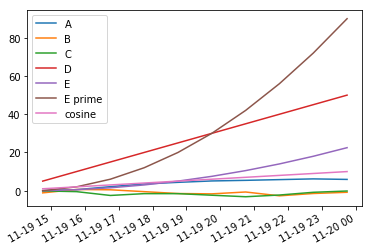

In [68]:
import matplotlib.pyplot as plt
pdf=pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')
plt.show()